In [1]:
import numpy as np
import random as rd


class KMeans:
    """
    kmeans算法过程  周志华——机器学习

      输入：训练数据集 $ D ={x{(1)},x{(2)},...,x^{(m)}},聚类簇数k  ;
      过程：函数 kMeans(D,k,maxIter) .
      1：从 D 中随机选择 k 个样本作为初始“簇中心”向量： $ {\mu{(1)},\mu{(2)},...,,\mu^{(k)}} $ :
      2：repeat
      3：  令 Ci=∅(1≤i≤k)
      4：  for j=1,2,...,m do
      5：    计算样本 x(j) 与各“簇中心”向量 μ(i)(1≤i≤k) 的欧式距离
      6：    根据距离最近的“簇中心”向量确定 x(j) 的簇标记： λj=argmini∈{1,2,...,k}dji
      7：    将样本 x(j) 划入相应的簇： Cλj=Cλj⋃{x(j)} ;
      8：  end for
      9：  for i=1,2,...,k do
      10：    计算新“簇中心”向量： (μ(i))′=1|Ci|∑x∈Cix ;
      11：    if (μ(i))′!=μ(i) then
      12：      将当前“簇中心”向量 μ(i) 更新为 (μ(i))′
      13：    else
      14：      保持当前均值向量不变
      15：    end if
      16：  end for
      17：  else
      18：until 当前“簇中心”向量均未更新
      输出：簇划分 C=C1,C2,...,CK
    """
    
    
    def __init__(self, k = 3, max_iter = 1000, random_state = None):
              
        # 聚类中心个数
        self.k = k
        # 最大迭代次数
        self.max_iter = max_iter
        # 最终的中心点
        self.final_center = None
        # 初始化生成中心点的随机种子 
        self.random_state = random_state
    
    
    def fit(self, X_train):
        """根据X_train进行聚类 """
        
        # 获取特征数和样本数
        n_sample, n_feature = X_train.shape
        # 每个簇的中心
        self.center = np.zeros((self.k, n_feature))
        #保存聚类结果
        self.cluster = [[] for _ in range(self.k)]
        # 随机选取k个index对应的样本作为中心点
        rand = np.random.RandomState(self.random_state)
        sample_data_index = rand.randint(0, X.shape[0], self.k)
        # 生成k个中心点
        self.center = X_train[sample_data_index]
        
        for _ in range(self.max_iter):
            for i in range(n_sample):
                # 样本i距离其它样本的最小距离
                min_dist = np.inf   # np.inf  无穷大  （因为要求与中心点距离最小的样本）
                # 最小距离所对应的中心点
                min_center = 0
                for j in range(self.k):
                    # 第i个样本与第j个中心的距离
                    dist= np.sqrt(np.sum(np.square(X_train[i]-self.center[j])))
                    if dist < min_dist:
                        min_dist = dist
                        min_center = j
                # 将第i个样本划分到距离最近的簇
                self.cluster[min_center].append(i)
                
            # 更新聚类中心    
            prev_center = self.center
            for j in range(self.k):
                # 该簇所有样本索引
                idx = self.cluster[j]
                # 计算新的簇中心（求当前簇所有样本的均值）
                self.center[j] = np.mean(X_train[idx], axis=0)
            center_diff = self.center - prev_center
            # 如果聚类中心不再移动则聚类结束
            if np.all(center_diff == 0):
                self.final_center = self.center
                break
    def predict(self, X_test):
        # 根据fit里的聚类结果 self.cluster  给每个样本一个聚类中心
        y_pred = np.zeros(X_test.shape[0])
        for i in range(self.k):
            # 遍历该簇样本 （样本的index）
            for j in self.cluster[i]:
                y_pred[j] = i
        return y_pred

In [2]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
X,y = make_blobs(n_samples=150,
                 n_features=2,
                 centers=3,
                 cluster_std=0.5,
                 shuffle=True,
                 random_state=0)

In [3]:
X.shape

(150, 2)

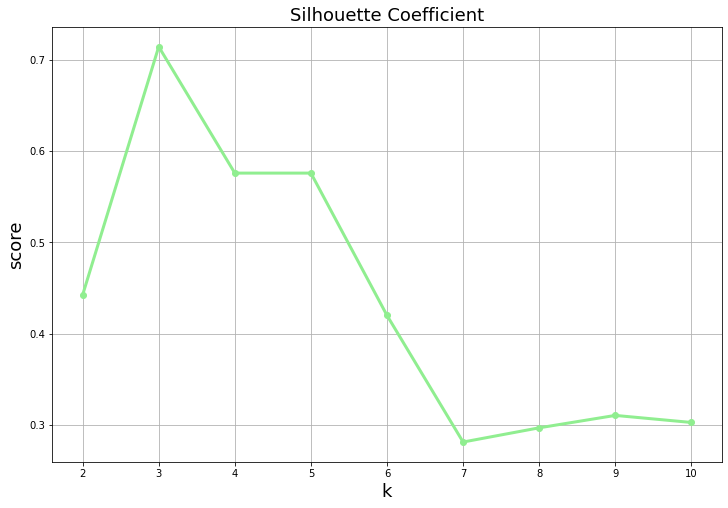

In [9]:
# 最佳k值选择  轮廓系数法(Silhouette Coefficient）
"""求出所有样本的轮廓系数后再求平均值就得到了平均轮廓系数。平均轮廓系数的取值范围为[-1,1]，
且簇内样本的距离越近，簇间样本距离越远，平均轮廓系数越大，聚类效果越好。平均轮廓系数最大的k便是最佳聚类数。"""
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
Scores = []  # 存放轮廓系数

for k in range(2, 11):
    clf = KMeans(k = k, random_state = 6)  # 构造聚类器
    clf.fit(X)
    Scores.append(silhouette_score(X, clf.predict(X)))
    
plt.figure(figsize = (12, 8))
plt.xlabel('k', fontsize = 18)
plt.ylabel('score', fontsize = 18)
plt.grid()
plt.title('Silhouette Coefficient', fontsize = 18)
plt.plot(range(2, 11), Scores, 'o-', c = 'lightgreen', linewidth = 3)
plt.show()

**由上图可以看出平均轮廓系数最大的k=3, 故k=3为最佳聚类数**

In [10]:
# 因为初始中心点为随机生成所以聚类结果每次都有差别，指定随机种子random_state则可解决这一问题  random_state默认为None
clf = KMeans(k = 3, max_iter = 1000, random_state = 6)
clf.fit(X)
y_pred = clf.predict(X)

<Figure size 1600x640 with 0 Axes>

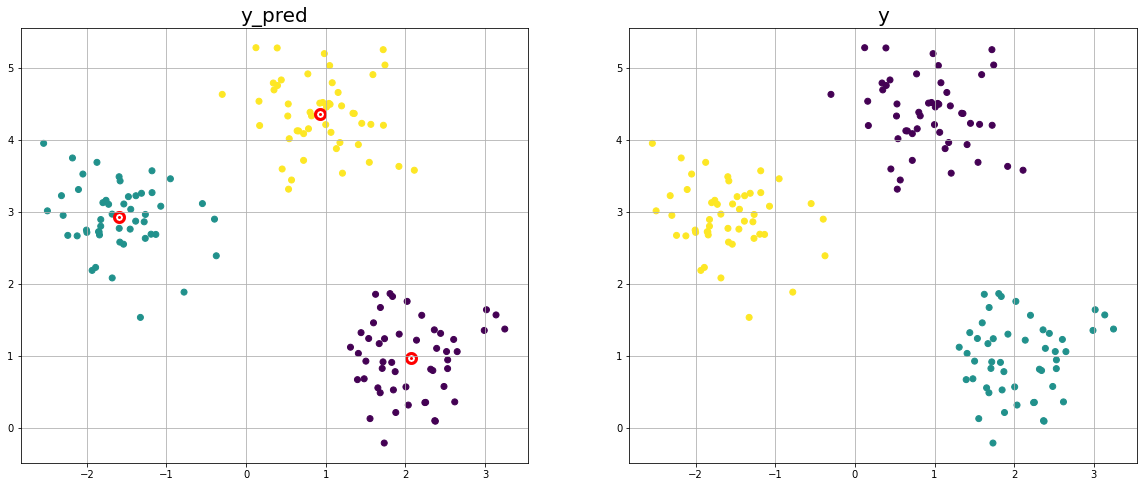

In [11]:
# 画图    自己实现的KMeans划分的类 与正确结果对比
plt.figure(figsize = (20, 8) ,dpi = 80)
f, ax = plt.subplots(1, 2, figsize = (20, 8), )
ax[0].scatter(X[: , 0], X[:, 1], c = y_pred)
ax[0].scatter(clf.final_center[:, 0], clf.final_center[:, 1], marker = '.', c = 'r', linewidth = 10)
ax[0].grid()
ax[0].set_title("y_pred", fontsize = 20 )
ax[1].scatter(X[: , 0], X[:, 1], c = y )
ax[1].set_title("y", fontsize = 20)
ax[1].grid()

plt.show()

<Figure size 1600x640 with 0 Axes>

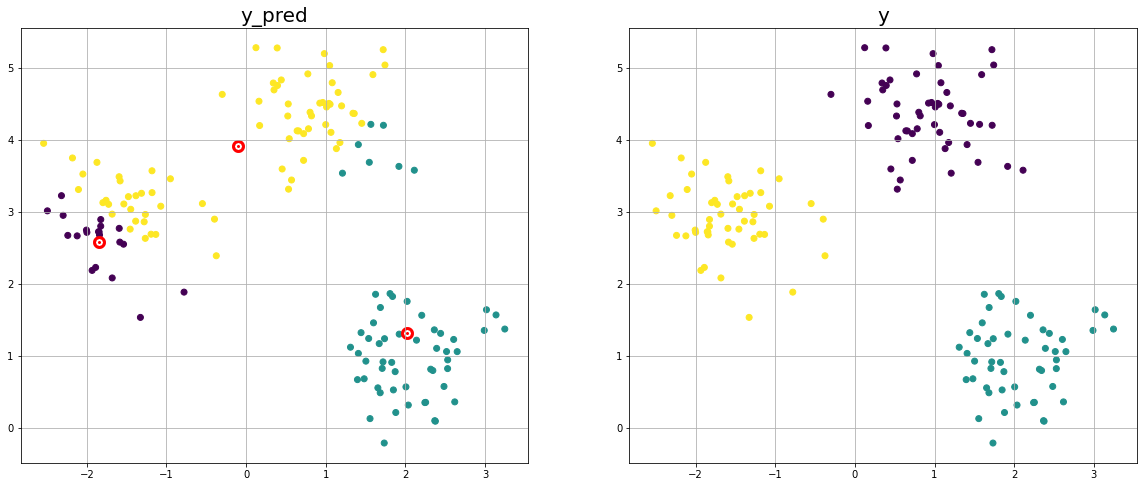

In [21]:
# 不指定randomstate
clf = KMeans(k = 3, max_iter = 1000)
clf.fit(X)
y_pred = clf.predict(X)
plt.figure(figsize = (20, 8) ,dpi = 80)
f, ax = plt.subplots(1, 2, figsize = (20, 8), )
ax[0].scatter(X[: , 0], X[:, 1], c = y_pred)
ax[0].scatter(clf.final_center[:, 0], clf.final_center[:, 1], marker = '.', c = 'r', linewidth = 10)
ax[0].grid()
ax[0].set_title("y_pred", fontsize = 20 )
ax[1].scatter(X[: , 0], X[:, 1], c = y )
ax[1].set_title("y", fontsize = 20)
ax[1].grid()

plt.show()